# Final Capstone: Where are the safest cities to live in the United States?

#### Purpose: 
For my final capstone project, I will be tackling the question, “Where are the safest cities to live in the United States?” utilizing datasets found on Kaggle.com. 
I will be using the datasets provided and other supplemental data to analyze what characteristics of a city in the US makes it safer or more dangerous.  

#### URL to data/resources: 
https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us

https://data.census.gov/cedsci/table?q=Hispanic%20or%20Latino&tid=ACSDP1Y2017.DP05&hidePreview=false

https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system#:~:text=That%20same%20three%2Dperson%20family,considered%20poor%20or%20near%2Dpoor.&text=For%20high%20earners%2C%20a%20three,more%20than%20%24373%2C894%20are%20rich

#### Summary: 
This dataset was formed and curated by The Washington Post in response to the BLM movement to keep a record of the identities of individuals who were shot and killed by a police officer in the line of duty. Features such as race, age, gender, and whether they were armed are some of the attributes that are recorded in the dataset. 

#### 4 Hypothesis that I will be testing: 
    1. Greater asian populations result in less police shootings.
    2. Cities with a higher percentage of people who have completed high school are less likely to have fatal police shootings.
    3. Cities with lower median household income and greater poverty levels have more police shootings.
    4. Black people are more likely to be shot than white people.

#### My method: 
To test my hypothesis, I will use the following libraries for my analysis; pandas, seaborn, scipy, numpy, matplotlib, and pandas_profiling. 
I will join relevant layers to create visualizations and perform sample t tests within features provided by the datasets to fail to disprove or disprove my hypothesis.

#### Audience: 
People looking to live or relocate to a different part of the US will find value from this project. Depending on their own background and preferences, people may use these insights to determine which city or area should be avoided.

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=239950 sha256=6e42aff0f02e112879202e622db96e7fa7b7a47c15314d4615fd30989b3cfa6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-h5mvx1j2/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from scipy.stats import ttest_ind

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Import datasets
household_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/project_datasets/MedianHouseholdIncome2015.csv', encoding='unicode_escape')
poverty_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/project_datasets/PercentagePeopleBelowPovertyLevel.csv', encoding='unicode_escape')
school_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/project_datasets/PercentOver25CompletedHighSchool.csv', encoding='unicode_escape')
deaths_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/project_datasets/PoliceKillingsUS.csv', encoding='unicode_escape')
race_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/project_datasets/ShareRaceByCity.csv', encoding='unicode_escape')

In [5]:
# Perform basic data cleaning for each imported layer for joins
# determined which strings to replace by looking directly inside the tables in an excel file and also through errors that I ran into during my analysis
deaths_df["city"] = deaths_df["city"].apply(lambda x: x.lower().replace(" city","").replace(" municipality", "").replace(" cdp","").replace(" county","").replace("borough","").replace(" town", "").replace(" village", "").replace("mt ", "mount ").replace("mt.", "mount").strip())
race_df["City"] = race_df["City"].apply(lambda x: x.lower().replace(" city","").replace(" municipality", "").replace(" cdp","").replace(" county","").replace("borough","").replace(" town", "").replace(" village", "").strip())
school_df["City"] = school_df["City"].apply(lambda x: x.lower().replace(" city","").replace(" municipality", "").replace(" cdp","").replace(" county","").replace("borough","").replace(" town", "").replace(" village", "").strip())
poverty_df["City"] = poverty_df["City"].apply(lambda x: x.lower().replace(" city","").replace(" municipality", "").replace(" cdp","").replace(" county","").replace("borough","").replace(" town", "").replace(" village", "").strip())
household_df["City"] = household_df["City"].apply(lambda x: x.lower().replace(" city","").replace(" municipality", "").replace(" cdp","").replace(" county","").replace("borough","").replace(" town", "").replace(" village", "").strip())

In [6]:
# Create a EDA report with pandas profiling
death_prof = ProfileReport(deaths_df)
race_prof = ProfileReport(race_df)
school_prof = ProfileReport(school_df)
poverty_prof = ProfileReport(poverty_df)
household_prof =ProfileReport(household_df)

In [7]:
# loads EDA report for the csv table
# usable attributes for my hypothesis' include 'race'
# join on 'state' and 'city'
death_prof

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# useable attributes include 'share_white', 'share_black', 'share_asian', 'share_hispanic'
# able to join on 'Geographic area' (state), and 'City'
race_prof

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# useable attribute include 'percent_completed_hs'
# join on 'Geographic Area', and 'City'
school_prof

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# useable attribute for analysis include 'poverty_rate'
# joinable layers include 'Geographic Area' and 'City'
poverty_prof

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# useful attribute include 'Median Income'
# Joinable layer include 'Geographic Area' and 'City'
household_prof

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Hypothesis 1: Greater asian populations result in less police shootings

In [12]:
# Checking number of rows for reference
race_df.shape, deaths_df.shape

((29268, 7), (2535, 14))

In [13]:
# To see what columns to merge on
race_df.columns, deaths_df.columns

(Index(['Geographic area', 'City', 'share_white', 'share_black',
        'share_native_american', 'share_asian', 'share_hispanic'],
       dtype='object'),
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
        'flee', 'body_camera'],
       dtype='object'))

In [14]:
# Cleaning data for analysis
race_df.replace(['-'],0.0,inplace = True)
race_df.replace(['(X)'],0.0,inplace = True)
race_df = race_df.astype({'share_white': 'float','share_black': 'float','share_native_american': 'float','share_asian': 'float','share_hispanic': 'float'}) # changing data type of these columns for data analysis
race_death_df = pd.merge(deaths_df, race_df, left_on=["city", "state"], right_on=["City", "Geographic area"], how="left")

In [15]:
# checking if join was successful
race_death_df.head(5)

id                name  ... share_asian share_hispanic
0   3          Tim Elliot  ...         1.1           19.2
1   4    Lewis Lee Lembke  ...         8.9           21.1
2   5  John Paul Quintero  ...         4.8           15.3
3   8     Matthew Hoffman  ...        33.3           15.1
4   9   Michael Rodriguez  ...         0.9           43.1

[5 rows x 21 columns]

In [16]:
# Checking to see if merge was sucessful and data types have been updated for the columns I updated in the cell above
race_death_df.isnull().sum(), race_death_df.dtypes

(id                           0
 name                         0
 date                         0
 manner_of_death              0
 armed                        9
 age                         78
 gender                       0
 race                       197
 city                         0
 state                        0
 signs_of_mental_illness      0
 threat_level                 0
 flee                        65
 body_camera                  0
 Geographic area            263
 City                       263
 share_white                263
 share_black                263
 share_native_american      263
 share_asian                263
 share_hispanic             263
 dtype: int64, id                           int64
 name                        object
 date                        object
 manner_of_death             object
 armed                       object
 age                        float64
 gender                      object
 race                        object
 city                     

In [17]:
# Finding the population means of each race in each city
race_death_df.describe()

id          age  ...  share_asian  share_hispanic
count  2546.000000  2468.000000  ...  2283.000000     2283.000000
mean   1444.340141    36.588736  ...     4.481516       20.885677
std     795.085748    13.014531  ...     6.620101       20.521364
min       3.000000     6.000000  ...     0.000000        0.000000
25%     765.250000    26.000000  ...     1.000000        5.000000
50%    1450.000000    34.000000  ...     2.500000       12.700000
75%    2125.750000    45.000000  ...     5.100000       31.850000
max    2822.000000    91.000000  ...    61.900000       97.900000

[8 rows x 7 columns]

In [18]:
# Dividing the data at the US asian population percentage mean
more_asian = race_death_df.loc[race_death_df['share_asian'] >= 1.54]['share_asian'].values
less_asian = race_death_df.loc[race_death_df['share_asian'] < 1.54]['share_asian'].values
race_death_df['sample_class_a'] = race_death_df['share_asian'].apply(lambda row: 'high' if row >= 1.54 else 'low')

Ho: There is not a significant difference in deaths between high and low asian populations.

Ha: There is a significant difference in deaths between high and low asian populations.

The p value is significantly lower than 0.05. Meaning, there is a statistically significant difference between the number of deaths that occured in cities with higher or lower asian populations.


In [19]:
# Perform t-test between deaths that occured in cities with asian populations greater than 1.54% and cities with asian populations lesser than 1.54%
stat, p = ttest_ind(more_asian, less_asian)
print('t=%.3f, p=%.3f' % (stat, p))

t=22.209, p=0.000


Visually we see that more fatal police shootings occured where there were less of an asian population present.

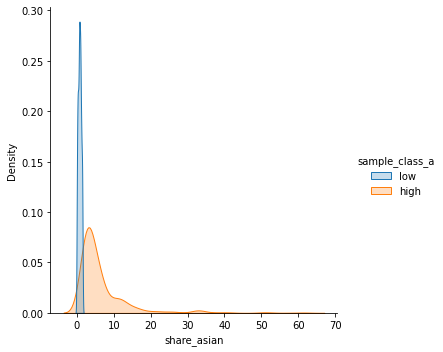

In [20]:
sns.displot(race_death_df, x="share_asian", hue="sample_class_a", kind="kde", fill=True)

At first glance it looks like our hypothesis was correct. Cities with greater asian populations have had less deaths by police. Even the t-test shows that the p-value is significantly small which means that it is statistically significant. Therefore, greater asian populations mean that there are less deaths by police.

#### What about the other racial populations? Let's check out whether the same is true for white, black and hispanic populations.

In [21]:
# Dividing the data at the US white population percentage mean.
more_white = race_death_df.loc[race_death_df['share_white'] >= 83.212835]['share_white'].values
less_white = race_death_df.loc[race_death_df['share_white'] < 83.212835]['share_white'].values
race_death_df['sample_class_w'] = race_death_df['share_white'].apply(lambda row: 'high' if row >= 83.212835 else 'low')

Ho: There is not a significant difference in deaths between high and low white populations.

Ha: There is a significant difference in deaths between high and low white populations.

The p value is significantly lower than 0.05. Meaning, there is a statistically significant difference between the number of deaths that occured in cities with higher or lower white populations.

In [22]:
# Perform t-test between deaths that occured in cities with white populations greater than 83.2% and cities with white populations lesser than 83.2%

stat, p = ttest_ind(more_white, less_white)
print('t=%.3f, p=%.3f' % (stat, p))

t=45.534, p=0.000


Visually we see that cities with more white people have had more deaths from fatal police shootings.


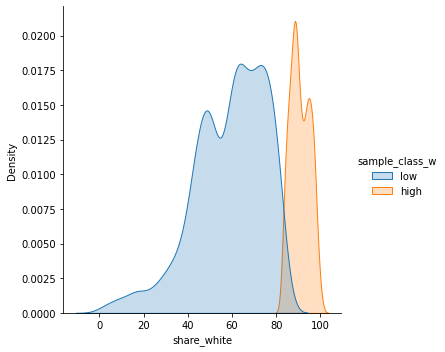

In [23]:
sns.displot(race_death_df, x="share_white", hue="sample_class_w", kind="kde", fill=True)

In [24]:
# Dividing the data at the US black population percentage mean.
more_black = race_death_df.loc[race_death_df['share_black'] >= 6.834607]['share_black'].values
less_black = race_death_df.loc[race_death_df['share_black'] < 6.834607]['share_black'].values
race_death_df['sample_class_b'] = race_death_df['share_black'].apply(lambda row: 'high' if row >= 6.834607 else 'low')

Ho: There is not a significant difference in deaths between high and low black populations.

Ha: There is a significant difference in deaths between high and low black populations.

The p value is significantly lower than 0.05. Meaning, there is a statistically significant difference between the number of deaths that occured in cities with higher or lower black populations.

In [25]:
# Perform t-test between deaths that occured in cities with black populations greater than 6.83% and cities with black populations lesser than 6.83%
stat, p = ttest_ind(more_black, less_black)
print('t=%.3f, p=%.3f' % (stat, p))

t=42.074, p=0.000


Again, we see visually, more fatal police shootings occured where there were less of a black population.

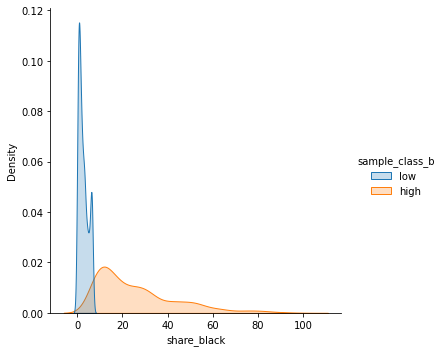

In [26]:
sns.displot(race_death_df, x="share_black", hue="sample_class_b", kind="kde", fill=True)

In [27]:
# Dividing the data at the US hispanic population percentage mean.
more_hispanic = race_death_df.loc[race_death_df['share_hispanic'] >= 9.329455]['share_hispanic'].values
less_hispanic = race_death_df.loc[race_death_df['share_hispanic'] < 9.329455]['share_hispanic'].values
race_death_df['sample_class_h'] = race_death_df['share_hispanic'].apply(lambda row: 'high' if row >= 9.329455 else 'low')

Ho: There is not a significant difference in deaths between high and low hispanic populations.

Ha: There is a significant difference in deaths between high and low hispanic populations.

The p value is significantly lower than 0.05. Meaning, there is a statistically significant difference between the number of deaths that occured in cities with higher or lower hispanic populations.

In [28]:
# Perform t-test between deaths that occured in cities with hispanic populations greater than 9.33% and cities with black populations lesser than 9.33%

stat, p = ttest_ind(more_hispanic, less_hispanic)
print('t=%.3f, p=%.3f' % (stat, p))

t=43.675, p=0.000


And again, we see that more deaths occured where there were less of an hispanic population present.


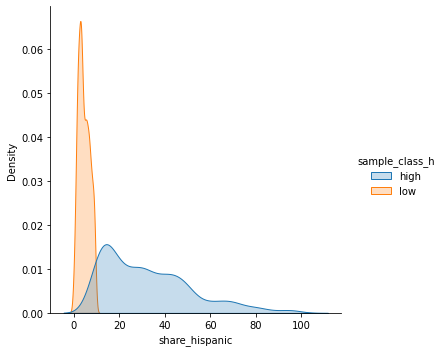

In [29]:
sns.displot(race_death_df, x="share_hispanic", hue="sample_class_h", kind="kde", fill=True)

### Result
Seeing how the same results appeared in all but the white population, shows that perhaps the data is not balanaced.
I speculate that the reason why the data shows that more deaths happened in cities where there is less of an asian, black and hispanic population and not in the white population is because
most of the shootings occured in major cities where the white population dominates. 
Also, there are not many cities in the US where any single ethnicity is the majority of the whole population of a city except for white people.
At this time, it is not possible to reliably test whether a single race has an influence in the number of deaths that occur in the US.

## Hypothesis 2: Cities with a higher percentage of people who have completed high school are less likely to have fatal police shootings.

In [30]:
# To see which column to join tables on
school_df.columns, deaths_df.columns

(Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object'),
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
        'flee', 'body_camera'],
       dtype='object'))

In [31]:
# To view data type
# We need to change the data type of the 'percent_completed_hs' to float in order to analyze it
school_df.dtypes

Geographic Area         object
City                    object
percent_completed_hs    object
dtype: object

In [32]:
# joining tables
high_df = pd.merge(deaths_df, school_df, left_on=["city", "state"], right_on=["City", "Geographic Area"], how="left")
high_df[['percent_completed_hs']] = high_df[['percent_completed_hs']].apply(pd.to_numeric) # updating the column to float

In [33]:
# checking if join was successful
high_df.head(5)

id                name  ...           City percent_completed_hs
0   3          Tim Elliot  ...        shelton                 80.1
1   4    Lewis Lee Lembke  ...          aloha                 88.1
2   5  John Paul Quintero  ...        wichita                 87.5
3   8     Matthew Hoffman  ...  san francisco                 87.0
4   9   Michael Rodriguez  ...          evans                 76.3

[5 rows x 17 columns]

In [34]:
# Find mean of percent_completed_hs
high_df.describe()

id          age  percent_completed_hs
count  2546.000000  2468.000000           2285.000000
mean   1444.340141    36.588736             84.085164
std     795.085748    13.014531              8.343548
min       3.000000     6.000000              7.900000
25%     765.250000    26.000000             80.300000
50%    1450.000000    34.000000             85.200000
75%    2125.750000    45.000000             89.400000
max    2822.000000    91.000000            100.000000

More fatal police shootings occured in cities where the percentage of the population who've completed high school are greater than the 84.09% (mean value)

In [35]:
# Divide data by mean percentage of percent_completed_hs of all cities in the US
more_edu = high_df.loc[high_df['percent_completed_hs'] >= 84.085164]['percent_completed_hs'].values
less_edu = high_df.loc[high_df['percent_completed_hs'] < 84.085164]['percent_completed_hs'].values
high_df['sample class'] = high_df['percent_completed_hs'].apply(lambda row: 'high' if row >= 84.085164 else 'low')

Ho: There is a significant difference in the number of deaths between higher and lower percentage of the population that completed high school in cities.

Ha: There is not a significant difference in the number of deaths between higher and lower percentage of the population that completed high school in cities.

The p value is significantly lower than 0.05. Meaning, there is a statistically significant difference between the number of deaths that occured in cities where the population have a higher or a lower precentage of people who've completed high school.

In [36]:
# t-test between each group
stat, p = ttest_ind(more_edu, less_edu)
print('t=%.3f, p=%.3f' % (stat, p))

t=54.236, p=0.000


Visually we see more fatal police shootings occured where more of the population in cities graduated from high school

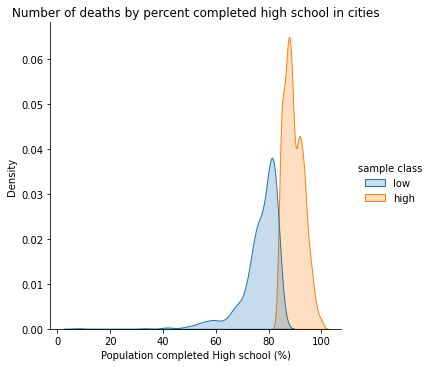

In [37]:
sns.displot(high_df, x="percent_completed_hs", hue="sample class", kind="kde", fill=True)
plt.xlabel('Population completed High school (%)')
plt.title('Number of deaths by percent completed high school in cities')
plt.show()

### Result

In my t-test, my p-value was less than 0.05 meaning there is a statistically significant difference in the number of deaths between cities with a greater number of high school gradutes and cities with less number of high school gradutes. From the graph above, we can see that cities with a greater number of high school gradutes actually resulted in more deaths by the police. 

## Hypothesis 3: Cities with lower median household income and greater poverty levels have more police shootings.

In [38]:
# See which columns to join on
household_df.columns, poverty_df.columns, deaths_df.columns

(Index(['Geographic Area', 'City', 'Median Income'], dtype='object'),
 Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object'),
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
        'flee', 'body_camera'],
       dtype='object'))

In [39]:
# Data cleaning and preparation
household_df['Median Income'] = household_df['Median Income'].astype(str).apply(lambda x: x.replace('2,500-', '2500').replace('(X)', '0').replace('-', '0').replace('250,000+', '250000').replace('nan','0').strip())
poverty_df['poverty_rate'] = poverty_df['poverty_rate'].astype(str).apply(lambda x: x.replace('-', '0').strip())

household_df = household_df[household_df['Median Income'].notna()] # remove null values
poverty_df = poverty_df[poverty_df['poverty_rate'].notna()]

household_df['Median Income'] = pd.to_numeric(household_df['Median Income'], downcast='float') # change column data type to float
poverty_df['poverty_rate'] = pd.to_numeric(poverty_df['poverty_rate'], downcast='float')

income_death_df = pd.merge(deaths_df, household_df, left_on=["city", "state"], right_on=["City", "Geographic Area"], how="left") # joining tables
pov_death_df = pd.merge(deaths_df, poverty_df, left_on=['city', 'state'], right_on=['City', 'Geographic Area'], how="left")

In [40]:
#Confirm join
income_death_df.head(5)

id                name    date  ... Geographic Area           City  Median Income
0   3          Tim Elliot  2/1/15  ...              WA        shelton        37072.0
1   4    Lewis Lee Lembke  2/1/15  ...              OR          aloha        65765.0
2   5  John Paul Quintero  3/1/15  ...              KS        wichita        45947.0
3   8     Matthew Hoffman  4/1/15  ...              CA  san francisco        81294.0
4   9   Michael Rodriguez  4/1/15  ...              CO          evans        47791.0

[5 rows x 17 columns]

In [41]:
# Confirming join
pov_death_df.head(5)

id                name    date  ... Geographic Area           City  poverty_rate
0   3          Tim Elliot  2/1/15  ...              WA        shelton     28.600000
1   4    Lewis Lee Lembke  2/1/15  ...              OR          aloha     14.900000
2   5  John Paul Quintero  3/1/15  ...              KS        wichita     17.299999
3   8     Matthew Hoffman  4/1/15  ...              CA  san francisco     13.200000
4   9   Michael Rodriguez  4/1/15  ...              CO          evans     16.600000

[5 rows x 17 columns]

### First let's examine the number of deaths by median household income by city

In [42]:
# looking for the population mean median household income
household_df.describe()

Median Income
count   29322.000000
mean    48002.628906
std     27777.048828
min         0.000000
25%     33341.000000
50%     43750.000000
75%     57985.500000
max    250000.000000

In [43]:
# Used mean income of all the cities in the US and create a new column to separate by high median household income and low median household income
low_income = income_death_df.loc[income_death_df['Median Income'] <= 48002.628906]['Median Income'].values
high_income = income_death_df.loc[income_death_df['Median Income'] > 48002.628906]['Median Income'].values
income_death_df['sample class'] = income_death_df['Median Income'].apply(lambda row: 'low' if row <= 48002.628906 else 'high')

Ho: There is not a significant difference in the number of deaths where the median income is higher or lower.

Ha: There is a significant difference in the number of deaths where the median income is higher or lower.

The p value is significantly lower than 0.05. Meaning, there is a statistically significiant difference in the number of deaths between higher or lower median household income.

In [44]:
# two sample t-test between high and low median household income
stat, p = ttest_ind(low_income, high_income)
print('t=%.3f, p=%.3f' % (stat, p))

t=-47.433, p=0.000


We see that there are more deaths in cities with lower median household income.

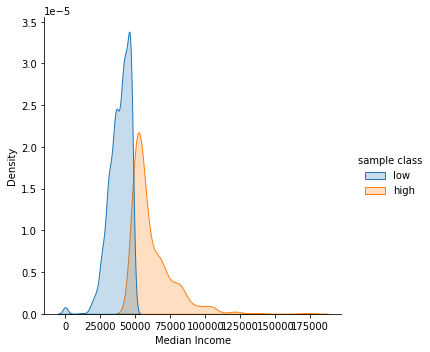

In [45]:
sns.displot(income_death_df, x="Median Income", hue="sample class", kind="kde", fill=True)

### Result

We see that that the p-value shows that the difference in the number of deaths in cities between low and high median household income is statistically significant and we are also able to visually see in the graph above that more deaths from fatal police shootings occured in cities where there is a lower median household income.

### What about by income class(Low, middle, upper)?

In [46]:
# Determined income class breaks based on this article: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system#:~:text=That%20same%20three%2Dperson%20family,considered%20poor%20or%20near%2Dpoor.&text=For%20high%20earners%2C%20a%20three,more%20than%20%24373%2C894%20are%20rich.

low_income = income_death_df.loc[income_death_df['Median Income'] <= 40100]['Median Income'].values
middle_income = income_death_df.loc[(income_death_df['Median Income'] <= 120400) & (income_death_df['Median Income'] > 40100)]['Median Income'].values
upper_income = income_death_df.loc[income_death_df['Median Income'] > 120400]['Median Income'].values
income_death_df['sample class1'] = income_death_df['Median Income'].apply(lambda row: 'low' if row <= 40100 else 'mid' if row <= 120400 else 'high')

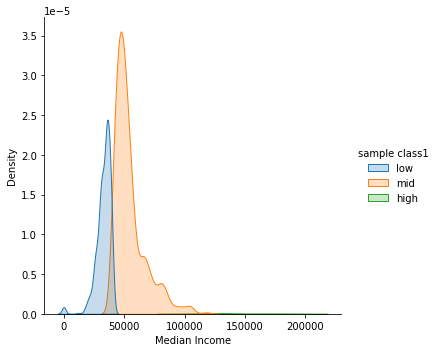

In [47]:
sns.displot(income_death_df, x="Median Income", hue="sample class1", kind="kde", fill=True)

### Result

We observe that more deaths have occured in cities where the majority of the population are in the upper lower class and the lower middle class.

### Now let's look at poverty levels

In [48]:
# looking for the population mean poverty rate
poverty_df.describe()

poverty_rate
count  29329.000000
mean      16.331287
std       13.202480
min        0.000000
25%        7.000000
50%       13.600000
75%       22.400000
max      100.000000

In [49]:
# Create a new column that categorizes the poverty rate percentage by low and high using the mean poverty rate percentage of all the cities in the US
low_pov = pov_death_df.loc[pov_death_df['poverty_rate'] <= 16.331287]['poverty_rate'].values
high_pov = pov_death_df.loc[pov_death_df['poverty_rate'] > 16.331287]['poverty_rate'].values
pov_death_df['sample class'] = pov_death_df['poverty_rate'].apply(lambda row: 'low' if row <= 16.331287 else 'high')

In [50]:
# t-test between low and high percentage of poverty rate
stat, p = ttest_ind(low_pov, high_pov)
print('t=%.3f, p=%.3f' % (stat, p))

t=-51.689, p=0.000


Ho: There is not a significant difference in the number of deaths where the poverty rate is higher or lower.

Ha: There is a significant difference in the number of deaths where the poverty rate is higher or lower.

The p value is significantly lower than 0.05. Meaning, there is a statistically significiant difference in the number of deaths in cities with higher or lower poverty rate.

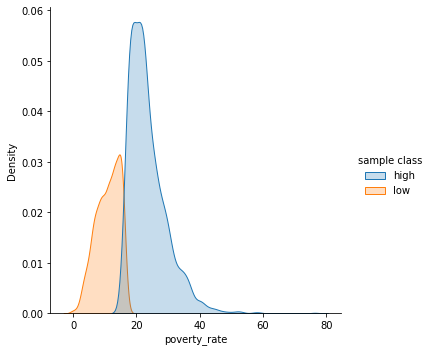

In [51]:
sns.displot(pov_death_df, x="poverty_rate", hue="sample class", kind="kde", fill=True)

### Result

The p value is less than 0.05 which makes it statistically significant and we can see from the graph that cities with greater a percentage of poverty have had more fatal police shootings than in cities with lower percentage of poverty. 

## Hypothesis 4: Black people are more likely to be shot than white people. 

In [52]:
# checking what columns are in deaths_df dataframe
deaths_df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [53]:
# checking how many categories in 'race' column of dataframe
deaths_df['race'].nunique()

6

In [54]:
# checking number of deaths by race
deaths_df['race'].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [55]:
# find count of deaths by each race and extract into a separate series to visualize
count = deaths_df['race'].value_counts(normalize=True) # By 'normalize=True' we make the data counts into precentages
count.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']

Text(0.5, 1.0, 'Total cases by race %')

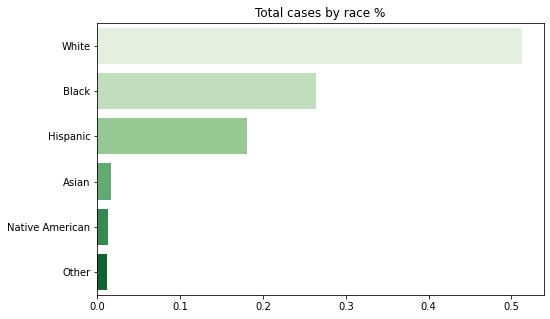

In [56]:
# setting up seaborn bar plot to visualize deaths by race
f, ax = plt.subplots(1,1, figsize=(8,5))
sequential_colors = sns.color_palette("Greens", 6)
sns.barplot(y=count.index, x=count.values, palette=sequential_colors)
plt.title("Total cases by race %")

White people are killed more than any race just based on the number of deaths

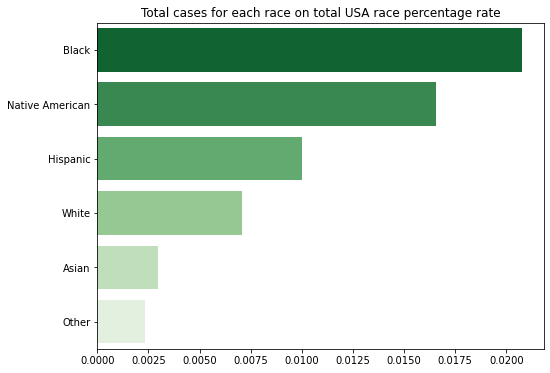

In [57]:
# Used the US 2017 census data to gather the percentage of each race representing the population
share_race_usa_2017 = pd.Series([72.3, 12.7, 0.8, 5.6, 18.1, 5.1], index=['White','Black','Native American','Asian','Hispanic','Other'])

count_races = count / share_race_usa_2017
count_races = count_races.sort_values(ascending=False)
f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count_races.index, x=count_races.values, palette='Greens_r')
ax.set_title('Total cases for each race on total USA race percentage rate');

However, when the number of deaths from each race are compared proportionatley to the population of the United States, black people are killed more than any other race.

Black individuals are disproportionatly killed more than white individuals in fatal police shootings even though more white individuals have been killed on an individual basis. 

As a bonus, let's look at which states have had the most deaths

In [58]:
# grouping number of deaths by state
deaths_state = deaths_df.groupby(['state']).count()['id'].reset_index()

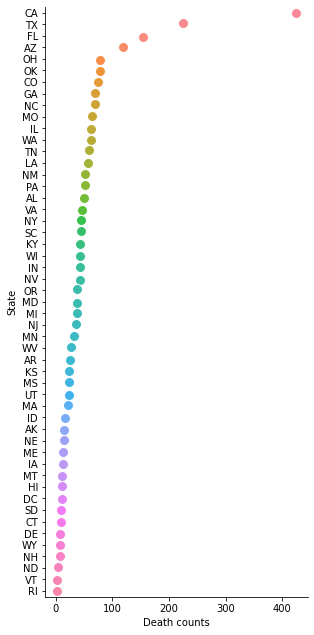

In [59]:
# visualizing number of deaths and ordering it by the number of deaths by state
g = sns.PairGrid(deaths_state.sort_values('id', ascending=False),
                 y_vars=['state'],
                 height=9, aspect=.5)
g.map(sns.stripplot, size=10, orient="h",linewidth=1, edgecolor="w")
g.set(xlabel="Death counts", ylabel="State")

Based on the data we see that California by far has had the most fatal police deaths and then Texas.

# Conclusion

Here are the results from testing my hypothesis.

**H1**: Greater asian populations result in less police shootings. 
**Answer**: Not enough data to find conclusion

**H2**: Cities with a higher percentage of people who have completed high school are less likely to have fatal police shootings.
**Answer**: False. Cities with a greater percentage of the population who have 
completed high school have had more deaths by police.

**H3**: Cities with lower median household income and greater poverty levels have more police shootings.
**Answer**: True. 

**H4**: Black people are more likely to be shot than white people.
**Answer**: Proportionately, yes. 


In conclusion, if you are looking to relocate to another city in the US, make sure that less than 84% of the population graduated high school, the median household income is at least greater than $48,002, the poverty rate is greater than 16.3%, and try to avoid moving to California, Texas or Florida.
Also keep in mind that if you are considered black, you are more likely to die by the police than any other race.

